In [1]:
import config
import mysql.connector
from IPython.display import display, Markdown
import csv
import os

In [2]:
def batch_execute_ddl(conn, file):
    cursor = conn.cursor()
    ddl_file = open(file)
    sql = ddl_file.read()
    
    # print(sql)
    # multi = True for multple statements
    for result in cursor.execute(sql, multi=True):
        if result.with_rows:
            print(f"Rows produced: {result.statement}")
            print(result.fetchall())
        else: 
            print(f"number of rows affected by statement {result.statement}: {result.rowcount}")
    
    conn.close()

def get_data(path):
    tables = os.listdir(path) 

    keys = [os.path.splitext(table)[0] for table in tables if table.endswith('.csv')]
    print(keys)

    d = dict.fromkeys(keys)
    # print(d)
    for key in keys:
        with open((path+key+'.csv'), newline='') as file:
            reader = csv.reader(file, delimiter=',')
            #ignore the column name
            next(reader)

            rows = []
            for row in reader:
                rows.append(tuple(row))

            d[key] = rows
            
    return(d)
    # print(d.keys())

def insert_data(conn, columnnames, data):
    try:
        # Connecting to the Database 
        # print(data)
        for table in columnnames:
            # print(table)
            query = "describe " + table
            
            columns = len(execute(conn, query))
            # print(columns)
            
            values = "(" + "%s,"*(columns-1) + "%s" ")"
            # print(data[table])
            # print(values)
            cursor = conn.cursor()
            cursor.executemany("insert into " + table + " values" + values, data[table]) 

            conn.commit()
            print("Table:", table,"\nRows affected: ",cursor.rowcount, "\nData inserted successfully")

    except mysql.connector.Error as error:
        print(error)
        conn.rollback()
        
        
def call_proc(conn, procname, arg):
    try:
        cursor = conn.cursor()
        cursor.callproc(procname, arg)
        # print out the result
        for result in cursor.stored_results():
            print(result.fetchall())
    except Error as e:
            print(e)
    finally:
        cursor.close()
        # conn.close()

def display(conn, column, query):
    table = execute(conn, query)
    # print("{0:20}{1:20}{2:20}".format("branch_name","branch_city","assets"))
    print("".join(["{:<15}".format(col) for col in column]))

    for row in table:
        print("".join(["{:<15}".format(str(col)) for col in row]))

def update(conn, query, arg = None, multiflag = False):
    try:
        cursor = conn.cursor()
        if(multiflag == False):
            if (arg != None):
                cursor.execute(query % arg)
            else:
                cursor.execute(query)  
        elif(multiflag):
            if (arg != None):
                cursor.execute(query % arg, multi = True)
            else:
                cursor.execute(query, multi = True)
            
        result = cursor.fetchall()
        # print("Result:", result)
        
        conn.commit()
    except mysql.connector.Error as error:
        print(error)
        conn.rollback()
        
        
def execute(conn, query):
    cursor = conn.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    return result
    # print("Result:", result)

In [3]:
conn = mysql.connector.connect(host=config.HOST,
                               user=config.USER, 
                               password=config.PASS)

print(conn.is_connected())

True


# (a)
### Create a database named db_airways either on localhost or your AWS instance. Create tables in your database by reducing the following ER diagram into tables and issuing the necessary DDL statements on your database. Also, insert into your database the sample data provided in the CSV files on Canvas

In [4]:
batch_execute_ddl(conn, 'db_airways.sql')

number of rows affected by statement drop database if exists airways: 10
number of rows affected by statement create database if not exists airways: 1
number of rows affected by statement use airways: 0
number of rows affected by statement create table person(
    name varchar(255) primary key,
    address varchar(255),
    phone varchar(255)
): 0
number of rows affected by statement create table plane(
    maker varchar(255),
    model_no varchar(255) primary key
    
): 0
number of rows affected by statement create table aircraft(
    serial_no integer,
    model_no varchar(255),
    foreign key (model_no) references plane (model_no),
    primary key (serial_no, model_no)
): 0
number of rows affected by statement create table flight(
    flight_no varchar(255) primary key,
    origin varchar(255),
    destination varchar(255),
    departure_time time,
    arrival_time time,
    status varchar(255)
): 0
number of rows affected by statement create table departure(
    departure_date va

In [5]:
conn = mysql.connector.connect(host=config.HOST,
                               user=config.USER, 
                               password=config.PASS,
                               database=config.MYDB)

In [6]:
path = "datasets/"
data = get_data(path)
print(data['aircraft'])

['aircraft', 'employee', 'pilot', 'flight', 'can_fly', 'person', 'departure', 'plane']
[('11', 'B727'), ('13', 'B727'), ('10', 'B747'), ('13', 'B747'), ('22', 'B757'), ('93', 'B757'), ('21', 'DC9'), ('22', 'DC9'), ('23', 'DC9'), ('24', 'DC9'), ('21', 'DC10'), ('70', 'A310'), ('80', 'A320')]


In [7]:
columnnames = ('person', 'plane', 'aircraft', 'flight', 'departure', 'employee','pilot')
insert_data(conn, columnnames, data)

Table: person 
Rows affected:  13 
Data inserted successfully
Table: plane 
Rows affected:  9 
Data inserted successfully
Table: aircraft 
Rows affected:  13 
Data inserted successfully
Table: flight 
Rows affected:  17 
Data inserted successfully
Table: departure 
Rows affected:  13 
Data inserted successfully
Table: employee 
Rows affected:  7 
Data inserted successfully
Table: pilot 
Rows affected:  3 
Data inserted successfully


# (b)
### Write SQL statements to insert the following passenger bookings and employee assignments into the database. Note that the following data does not represent tables. Insert the data based on your ERD reduction.

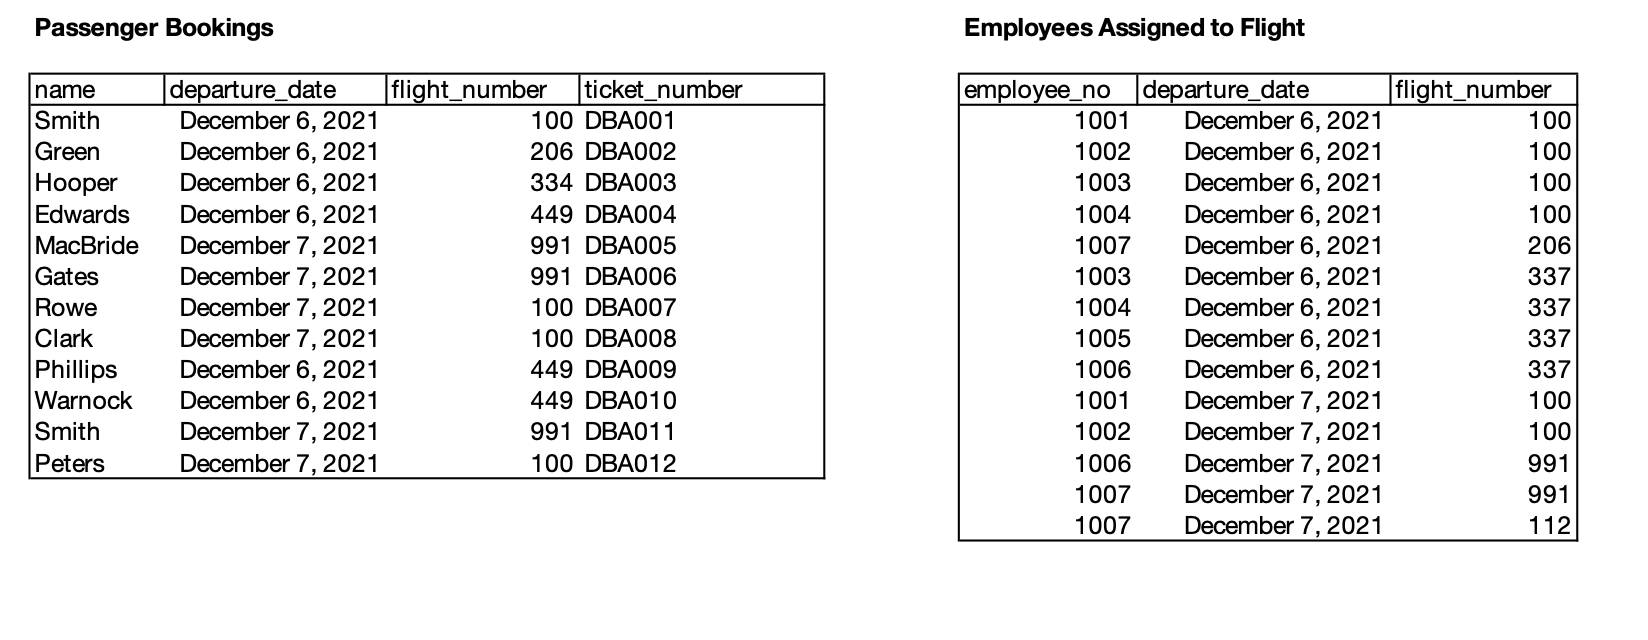

In [8]:
passenger = [('Smith', 'December 6, 2021', '100', 'DBA001'),
            ('Green', 'December 6, 2021', '206', 'DBA002'),
            ('Hooper', 'December 6, 2021', '334', 'DBA003'),
            ('Edwards', 'December 6, 2021', '449', 'DBA004'),
            ('MacBride', 'December 7, 2021', '991', 'DBA005'),
            ('Gates', 'December 7, 2021', '991', 'DBA006'),
            ('Rowe', 'December 7, 2021', '100', 'DBA007'),
            ('Clark', 'December 7, 2021', '100', 'DBA008'),
            ('Phillips', 'December 6, 2021', '449', 'DBA009'),
            ('Warnock', 'December 6, 2021', '449', 'DBA010'),
            ('Smith', 'December 7, 2021', '991', 'DBA011'),
            ('Peters', 'December 7, 2021', '100', 'DBA012')]


assigned = [('1001', 'December 6, 2021', '100'),
            ('1002', 'December 6, 2021', '100'),
            ('1003', 'December 6, 2021', '100'),
            ('1004', 'December 6, 2021', '100'),
            ('1007', 'December 6, 2021', '206'),
            ('1003', 'December 6, 2021', '337'),
            ('1004', 'December 6, 2021', '337'),
            ('1005', 'December 6, 2021', '337'),
            ('1006', 'December 6, 2021', '337'),
            ('1001', 'December 7, 2021', '100'),
            ('1002', 'December 7, 2021', '100'),
            ('1006', 'December 7, 2021', '991'),
            ('1007', 'December 7, 2021', '991'),
            ('1007', 'December 7, 2021', '112')]

newdata = {'passenger': passenger, 'assigned': assigned}

In [9]:
insert_data(conn, ('passenger','assigned'), newdata)

Table: passenger 
Rows affected:  12 
Data inserted successfully
Table: assigned 
Rows affected:  14 
Data inserted successfully


# (c)

### Write a single query that returns a list of all employees who are assigned to flights departing on December 7, 2021. Include the following fields in your result: employee_name, flight_number, origin, destination, departure_time, arrival_time, flight_duration, address, phone

In [10]:
columnames = ('NAME', 'FLIGHT_NO', 'ORIGIN', 'DESTINATION', 'DEPARTURE TIME', 'ARRIVAL TIME', 'DURATION', 'ADDRESS', 'PHONE')


c = """select name, flight_no, origin, destination, departure_time, arrival_time, timediff(arrival_time, departure_time), address, phone from 
                (((employee E 
                natural join
                assigned A)
                
                natural join
                
                (flight F
                natural join 
                departure D))
                
                natural join
                person P
                )
                
                where D.departure_date = "December 7, 2021"
                """
    # fetch(showquery, conn)
    


display(conn, columnames, c)
# print(len(fetch(c, conn)))

NAME           FLIGHT_NO      ORIGIN         DESTINATION    DEPARTURE TIME ARRIVAL TIME   DURATION       ADDRESS        PHONE          
Jones          100            SLC            BOS            8:00:00        17:50:00       9:50:00        234 Oak St.    801-552-2943   
Peters         100            SLC            BOS            8:00:00        17:50:00       9:50:00        345 Pine St.   801-393-2230   
Warnock        112            DCA            DEN            14:00:00       18:07:00       4:07:00        775 Main St.   801-303-2222   
Clark          991            BOS            ORD            17:00:00       18:22:00       1:22:00        223 Easy St.   801-193-2320   
Warnock        991            BOS            ORD            17:00:00       18:22:00       1:22:00        775 Main St.   801-303-2222   


# (d)
### Imagine that the airline would like to implement a trigger named emergency that sets a flight status to "canceled" when there is an emergency and the departure date for a flight has been changed to NULL. Create and test the emergency trigger by issuing an SQL statement to change all flights scheduled to depart on December 7, 2021 to a new departure date of NULL. Then print out the data in your flight table to show the cancellations.

In [11]:
trigger = """create trigger emergency before update on departure
            for each row
            begin
 
            if isnull(new.departure_date) then
            update flight
            set status='canceled' where flight_no = new.flight_no;
            end if;
            end;
            """

update(conn,trigger)

### BEFORE Trigger update

In [12]:
display(conn, ('flight_no','origin', 'destination', 'departure_time', 'arrival_time', 'status'), 'select * from flight')

flight_no      origin         destination    departure_time arrival_time   status         
100            SLC            BOS            8:00:00        17:50:00       on-time        
112            DCA            DEN            14:00:00       18:07:00       on-time        
121            STL            SLC            7:00:00        9:13:00        on-time        
122            STL            YYV            8:30:00        10:19:00       on-time        
206            DFW            STL            9:00:00        11:40:00       on-time        
330            JFK            YYV            16:00:00       18:53:00       on-time        
334            ORD            MIA            12:00:00       14:14:00       on-time        
335            MIA            ORD            15:00:00       17:14:00       on-time        
336            ORD            MIA            18:00:00       20:14:00       on-time        
337            MIA            ORD            20:30:00       23:53:00       on-time        

In [13]:
emergencytest = """update departure
                set departure_date = NULL where departure_date = 'December 7, 2021';
              """

update(conn,emergencytest)



## AFTER Trigger update

In [14]:
display(conn, ('flight_no','origin', 'destination', 'departure_time', 'arrival_time', 'status'), 'select * from flight')

flight_no      origin         destination    departure_time arrival_time   status         
100            SLC            BOS            8:00:00        17:50:00       canceled       
112            DCA            DEN            14:00:00       18:07:00       canceled       
121            STL            SLC            7:00:00        9:13:00        on-time        
122            STL            YYV            8:30:00        10:19:00       on-time        
206            DFW            STL            9:00:00        11:40:00       canceled       
330            JFK            YYV            16:00:00       18:53:00       on-time        
334            ORD            MIA            12:00:00       14:14:00       canceled       
335            MIA            ORD            15:00:00       17:14:00       on-time        
336            ORD            MIA            18:00:00       20:14:00       on-time        
337            MIA            ORD            20:30:00       23:53:00       on-time        

# (e)
### It has been estimated that airline pilots fly an average of 75 hours per month. Write a procedure named “estimate_pilot_years” that accepts a pilot’s employee ID and returns the number of years the pilot has been flying based on their flight hours in the database. (Assume the pilots at DB Airways work for 12 months per year. Do not worry about overtime, breaks, or any other complicating factor). Test your procedure by prompting the user for a pilot ID and printing out the number of years the pilot has been working for DB Airways.

In [15]:
procedure = """create procedure estimate_pilot_years
                (in id_no varchar(255), out years decimal(10,2))
                begin
                set years = (select hours from pilot where employee_no=id_no)/(75*12);
                end;
                """
execute(conn, procedure)


[]

## Testing estimate pilot years procedure

In [16]:
def call_proc(conn, args):
    cursor = conn.cursor()
    procedure_result = cursor.callproc('estimate_pilot_years', args)
    return procedure_result[1]

args_in = input("Enter employee ID: ")

print("Pilot years:", call_proc(conn, [args_in, 0]))

Enter employee ID:  1001


Pilot years: 10.00


In [17]:
args_in = input("Enter employee ID: ")

print("Pilot years:", call_proc(conn, [args_in, 0]))

Enter employee ID:  1002


Pilot years: 33.33


In [18]:
args_in = input("Enter employee ID: ")

print("Pilot years:", call_proc(conn, [args_in, 0]))

Enter employee ID:  1003


Pilot years: 16.67


In [19]:
display(conn, ('Employee','hours'), 'select * from pilot')


Employee       hours          
1001           9000.00        
1002           30000.00       
1003           15000.00       
